# Exploratory Data Analysis on COVID-19 in Brazil

This notebook provides a comprehensive exploratory data analysis of COVID-19 in Brazil, offering valuable insights into the pandemic's impact on the country.

<center><img alt="covid-19-exploratory-data-analysis-pedro-henrique-figueiredo-magalhaes" width="50%" src="https://static.poder360.com.br/2022/12/coronavirus-imagem-1-848x477.jpg"></center>

The dataset is a collection of COVID-19 data maintained by [Our World in Data](https://ourworldindata.org/coronavirus). For more information on the dataset visit the [OWID repository](https://github.com/owid/covid-19-data/tree/master/public/data).

## Introduction

COVID-19, caused by the SARS-CoV-2 virus, has had profound effects globally since its emergence in late 2019. Primarily spread through respiratory droplets, the virus has exhibited a wide range of clinical manifestations, from mild to severe symptoms, and in some cases, leading to death. Over the past years, extensive research and data collection efforts have enhanced our understanding of the disease, though challenges remain due to its evolving nature.

### Context

As of the latest data from trusted sources like the World Health Organization (WHO), Johns Hopkins University, and the Brazilian Ministry of Health, it is observed that a significant portion of COVID-19 cases are either asymptomatic or mild, accounting for approximately 80% of infections. However, around 15% of infected individuals develop severe symptoms requiring oxygen support, while about 5% become critically ill, necessitating mechanical ventilation and intensive care.

Brazil has been one of the countries most affected by the COVID-19 pandemic, experiencing multiple waves of infection with varying intensity. To enhance situational awareness and guide public health responses, this notebook aims to perform an exploratory data analysis (EDA) on publicly available COVID-19 data in Brazil. The analysis will focus on understanding the spread, severity, and trends of the disease within the country, providing insights that could aid in policy-making and healthcare management.

## Conclusions and Insights

### Key Findings

1. KF 1
2. KF 2
3. KF 3

### Implications and Recommendations

1. asd
2. asd
3. asd

--- 

## Data Analysis Notebook

1. [**Data Collection and Import**](#data-collection-and-import)
    - Importing necessary libraries
    - Loading the dataset

2. [**Data Preprocessing**](#data-preprocessing)
    - Handling missing values
    - Data cleaning and formatting

3. [**Exploratory Data Analysis**](#exploratory-data-analysis)
    - Summary statistics
    - Visualization of data
    - Analysis of trends and patterns

4. [**Conclusions and Insights**](#conclusions-and-insights)
    - Key findings from the analysis
    - Implications and recommendations
---
## Data dictionary 

### Confirmed cases

- total_cases: Total confirmed cases of COVID-19. Counts can include probable cases, where reported.
- total_cases_per_million: Total confirmed cases of COVID-19 per 1,000,000 people. Counts can include probable cases, where reported.

### Confirmed deaths

- total_deaths: Total deaths attributed to COVID-19. Counts can include probable deaths, where reported.
- total_deaths_per_million: Total deaths attributed to COVID-19 per 1,000,000 people. Counts can include probable deaths, where reported.

### Hospital & ICU

- hosp_patients: Number of COVID-19 patients in hospital on a given day.
- icu_patients: Number of COVID-19 patients in intensive care units (ICUs) on a given day.

### Policy responses

- stringency_index: Government Response Stringency Index: composite measure based on 9 response indicators including school closures, workplace closures, and travel bans, rescaled to a value from 0 to 100 (100 = strictest response).

### Others

- continent: Continent of the geographical location.
- location: Geographical location.
- iso_code: ISO 3166-1 alpha-3 – three-letter country codes. Note that OWID-defined regions (e.g. continents like 'Europe') contain prefix 'OWID_'.
- median_age: Median age of the population, UN projection for 2020.
- date: Date of observation.
- female_smokers: Share of women who smoke, most recent year available.
- male_smokers: Share of men who smoke, most recent year available.
- gdp_per_capita: Gross domestic product at purchasing power parity (constant 2011 international dollars), most recent year available.
- human_development_index: A composite index measuring average achievement in three basic dimensions of human development—a long and healthy life, knowledge and a decent standard of living. Values for 2019, imported from http://hdr.undp.org/en/indicators/137506.


---
## Credits

The raw data was collected, aggregated, and documented by Edouard Mathieu, Hannah Ritchie, Lucas Rodés-Guirao, Cameron Appel, Daniel Gavrilov, Charlie Giattino, Joe Hasell, Bobbie Macdonald, Saloni Dattani, Diana Beltekian, Esteban Ortiz-Ospina, and Max Roser.

Mathieu, E., Ritchie, H., Ortiz-Ospina, E. et al. A global database of COVID-19 vaccinations. Nat Hum Behav (2021). https://doi.org/10.1038/s41562-021-01122-8

Hasell, J., Mathieu, E., Beltekian, D. et al. A cross-country database of COVID-19 testing. Sci Data 7, 345 (2020). https://doi.org/10.1038/s41597-020-00688-8

---

## Data Collection and Import

Importing necessary libraries and loading the dataset.


In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
data = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"

df_raw = pd.read_csv(data,low_memory=False)

df_raw

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409802,ZWE,Africa,Zimbabwe,2024-06-12,266365.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
409803,ZWE,Africa,Zimbabwe,2024-06-13,266365.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
409804,ZWE,Africa,Zimbabwe,2024-06-14,266365.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
409805,ZWE,Africa,Zimbabwe,2024-06-15,266365.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [277]:
print(f"Dataset has {df_raw.shape[0]} rows and {df_raw.shape[1]} columns.\n")
print(df_raw.columns)

Dataset has 409807 rows and 67 columns.

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations

In [278]:
df_raw.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

Date column is **not** formatted as date, so let's format this column using *pd.to_datetime*.

In [279]:
df_raw.date = pd.to_datetime(df_raw.date)
df_raw.date.max()

Timestamp('2024-07-08 00:00:00')

We can find the latest figures for total deaths worldwide. 

In [280]:
df_raw.loc[df_raw.date == '2024-06-15',['total_deaths','location']].sort_values(by='total_deaths',ascending=False)[0:20]

,total_deaths,location
404908,7051323.0,World
157520,2990040.0,High income
390687,2667912.0,Upper middle income
115216,2100992.0,Europe
264064,1667166.0,North America
21127,1637123.0,Asia
342213,1354226.0,South America
209582,1341344.0,Lower middle income
116863,1261679.0,European Union
387437,1188935.0,United States


In [295]:
deaths_world = df_raw.loc[(df_raw.date == '2024-06-15'),['total_deaths','location']].sort_values(by='total_deaths',ascending=False)[0:1].iloc[0,0]

print(f"From the start of the pandemic back in 2018 until June 15th 2024, {round(deaths_world/1000000,2)} million people have died from COVID-19 worldwide.")

From the start of the pandemic back in 2018 until June 15th 2024, 7.05 million people have died from COVID-19 worldwide.


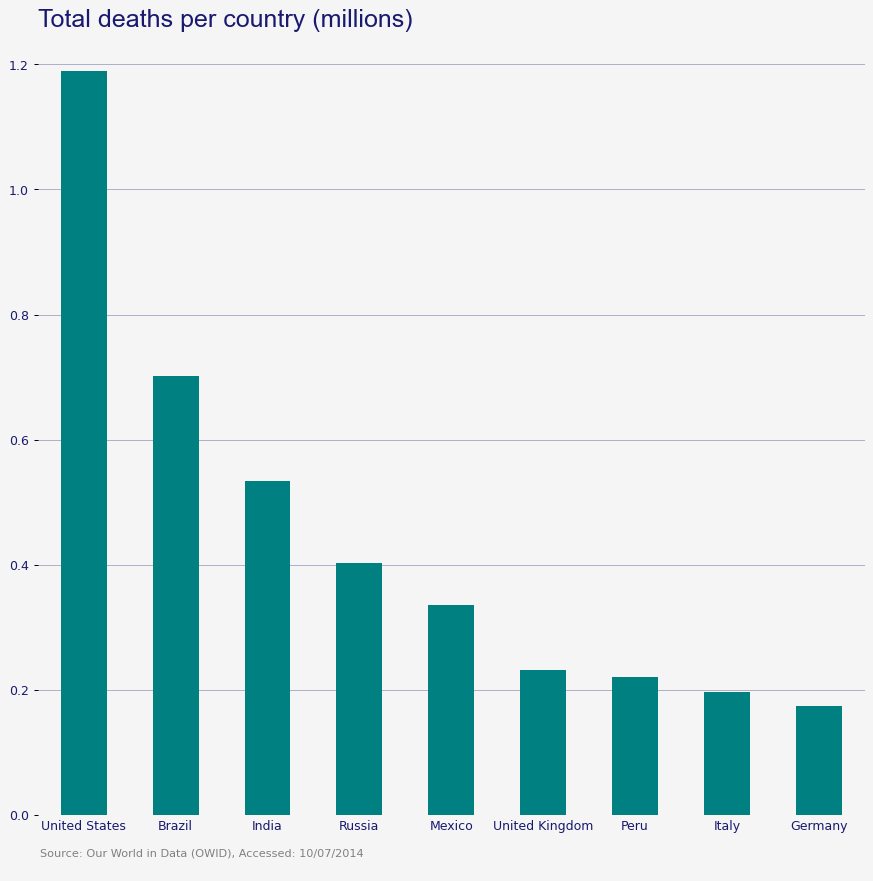

In [383]:
# here we filter for countries only by adding the column 'continent' and dropping rows with NaN values, meaning continents on 'location' get removed
deaths_top_10_countries =  df_raw.loc[df_raw.date == '2024-06-15',['total_deaths','location','continent']].sort_values(by='total_deaths',ascending=False)[9:19].set_index('location').dropna(axis=0)

# dividing by 1M to improve readability of the y-axis
deaths_top_10_countries = deaths_top_10_countries['total_deaths']/1000000

fig,ax = plt.subplots(figsize=(10,10),dpi=90);

fig.set(tight_layout=True)

deaths_top_10_countries.plot(kind='bar',
                             color='teal',
                             alpha=1,
                             zorder=3,
                             ax=ax);

fig.set_facecolor('whitesmoke')

ax.set_facecolor(color='whitesmoke')

ax.set_title("Total deaths per country (millions)",
             color='midnightblue',
             fontfamily='Arial',
             fontsize=20,
             loc='left')

ax.set_xlabel("").set_visible(False)

ax.xaxis.set_tick_params(rotation=0,
                         labelcolor='midnightblue',
                         size=0
                         )

ax.yaxis.set_tick_params(labelcolor='midnightblue')

ax.spines[:].set_visible(False)

ax.grid(axis='y',
        linewidth=0.5,
        color='midnightblue',
        alpha=0.5,
        zorder=0)

ax.legend().set_visible(False)

ax.annotate(text="Source: Our World in Data (OWID), Accessed: 10/07/2014",
            xycoords='figure pixels',
            xy=(40,25),
            color='grey',
            size=9
            );

## Data Preprocessing

### Handling Missing Values

Firstly, let's find the percentage of missing values in the data.

In [398]:
round(df_raw.isna().sum().sort_values(ascending=False)/df_raw.shape[0],2)[0:60]

weekly_icu_admissions_per_million             0.97
weekly_icu_admissions                         0.97
excess_mortality_cumulative_per_million       0.97
excess_mortality                              0.97
excess_mortality_cumulative                   0.97
excess_mortality_cumulative_absolute          0.97
weekly_hosp_admissions_per_million            0.94
weekly_hosp_admissions                        0.94
icu_patients                                  0.90
icu_patients_per_million                      0.90
hosp_patients_per_million                     0.90
hosp_patients                                 0.90
total_boosters_per_hundred                    0.87
total_boosters                                0.87
new_vaccinations                              0.83
new_tests                                     0.82
new_tests_per_thousand                        0.82
people_fully_vaccinated                       0.81
people_fully_vaccinated_per_hundred           0.81
total_tests                    

We should take note that we're dealing with a time series, in which days are the observation unit. This means that missing values for many of the columns in the dataset represent events that weren't observed. For example, 90% of data in column *icu_patients* is missing, while data spans from 2020 to 2024. During this period it is likely that the pandemic is under control in most, if not all countries. Therefore, one could expect that during this period there are less ICU patients, and that there's no reason to remove these entries as it may affect other data points.

Let's filter the dataset for the country we're interested in: Brazil. Then we'll have another look at missing values for relevant columns (refer to [**Data Dictionary**](#data-dictionary)).

### Data Cleaning and Formatting



## Exploratory Data Analysis

### Summary Statistics

### Visualization of Data

#### Time Series Analysis

#### Distribution of Cases

### Analysis of Trends and Patterns

## Conclusions and Insights

### Key Findings

1. KF 1
2. KF 2
3. KF 3

### Implications and Recommendations

1. asd
2. asd
3. asd